<a href="https://colab.research.google.com/github/2018007956/HYU/blob/main/%EC%A1%B8%EC%97%85%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/0_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# a = os.listdir('./House_Room_Dataset/Bathroom/')
# b = os.listdir('./House_Room_Dataset/Bedroom/')
# c = os.listdir('./House_Room_Dataset/Livingroom/')
# d = os.listdir('./House_Room_Dataset/Dinning/')
# e = os.listdir('./House_Room_Dataset/Kitchen/')
# print(len(a),len(b),len(c),len(d),len(e))
# print(len(a)+len(b)+len(c)+len(d)+len(e))

606 1248 1273 1158 965
5250


In [ ]:
import cv2
import torch
from PIL import Image
import numpy as np
import pandas as pd

In [ ]:
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5

In [ ]:
%cd '/content/drive/MyDrive/2022_2proj/yolov5'

/content/drive/MyDrive/2022_2proj/yolov5


In [ ]:
# !pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: YOLOv5 requirement "torchvision>=0.8.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.8.0-cp38-cp38-manylinux1_x86_64.whl (735.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-12-1 Python-3.8.15 torch-1.13.0+cu117 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
im = cv2.imread('../House_Room_Dataset/Bedroom/bed_11.jpg')[..., ::-1] # BGR to RGB
res = model(im)
res.print()
res.show()
res.xyxy[0]
res.pandas().xyxy[0]

RuntimeError: ignored

In [ ]:
# name 이 bed가 아닌 것만 골라내기
df = res.pandas().xyxy[0]

hold_list = ['bench', 'chair', 'couch','bed','dining table', 'toilet','tv','microwave','oven',
        'toaster','sink','refrigerator','clock','vase','hair drier','toothbrush']
df = pd.DataFrame([x for i,x in df.iterrows() if x['name'] not in hold_list])
df

In [ ]:
patches = []
for idx, row in df.iterrows():
  print(row['xmin'],row['xmax'],row['ymin'],row['ymax'])
  crop_img = im[int(row['xmin']):int(row['xmax']),int(row['ymin']):int(row['ymax'])]
  patches.append(crop_img)

In [ ]:
Image.fromarray(patches[0])

# LaMa

In [ ]:
%cd /content/drive/MyDrive/2022_2proj

In [ ]:
# !git clone https://github.com/saic-mdal/lama.git

%cd lama
# !pip install -r requirements.txt 

In [ ]:
!export TORCH_HOME=$(pwd) && export PYTHONPATH=$(pwd)

In [ ]:
# # Download pre-trained models
# !pip3 install wldhx.yadisk-direct

# # best model
# !curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
# !unzip big-lama.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  363M    0  363M    0     0  8476k      0 --:--:--  0:00:43 --:--:-- 10.1M
Archive:  big-lama.zip
replace big-lama/config.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: big-lama/config.yaml    
replace big-lama/models/best.ckpt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: big-lama/models/best.ckpt  


### Remove detected object

In [ ]:
!pip install torch==1.8.0 torchvision==0.9.0
!pip install torchtext==0.9.0
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.13.0-cp38-cp38-manylinux1_x86_64.whl (890.2 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.8.0
    Uninstalling torch-1.8.0:
      Successfully uninstalled torch-1.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.9.0 requires torch==1.8.0, but you have torch 1.13.0 which is incompatible.
torchtext 0.9.0 requires torch==1.8.0, but you have torch 1.13.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.13.0 which is incompatible.


In [ ]:
x = df.loc[df.index[0]]
mask_im = im
# mask_im[int(x['xmin']):int(x['xmax']),int(x['ymin']):int(x['ymax'])]=0
for idx,x in df.iterrows():
  mask_im[int(x['xmin']):int(x['xmax']),int(x['ymin']):int(x['ymax'])]=0


mask = Image.fromarray(mask_im)
mask.save('./configs/prediction/bed_11_mask001.jpg')###/default.yaml') ##########

In [ ]:
%ls

big-lama/      configs/              LICENSE     requirements.txt
big-lama.zip   data_for_prediction/  models/     saicinpainting/
bin/           detectron2/           output/
colab/         docker/               predict.py
conda_env.yml  fetch_data/           README.md


In [ ]:
!pip install kornia --no-dependencies
!pip install hydra
!pip install omegaconf
!pip install webdataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 551 kB 33.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 725 kB/s 
  Created wheel for hydra: filename=Hydra-2.5-cp38-cp38-linux_x86_64.whl size=253732 sha256=7177419920e49c32871f07bf6b1b0533c85e39e0cc373adbf680d406ee7a535c
  Stored in directory: /root/.cache/pip/wheels/d0/25/3a/15ed76174a2578d1bdd53d62fabf876273df191c3f6607304d
Successfully built hydra
^C
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Predict
!python3 ./predict.py model.path=$(pwd)/big-lama indir=$(pwd)/LaMa_test_images outdir=$(pwd)/output

Detectron v2 is not installed
Traceback (most recent call last):
  File "./predict.py", line 32, in <module>
    from saicinpainting.training.trainers import load_checkpoint
  File "/content/drive/MyDrive/2022_2proj/lama/saicinpainting/training/trainers/__init__.py", line 3, in <module>
    from saicinpainting.training.trainers.default import DefaultInpaintingTrainingModule
  File "/content/drive/MyDrive/2022_2proj/lama/saicinpainting/training/trainers/default.py", line 10, in <module>
    from saicinpainting.training.modules.fake_fakes import FakeFakesGenerator
  File "/content/drive/MyDrive/2022_2proj/lama/saicinpainting/training/modules/fake_fakes.py", line 2, in <module>
    from kornia import SamplePadding
ImportError: cannot import name 'SamplePadding' from 'kornia' (/usr/local/lib/python3.7/dist-packages/kornia/__init__.py)


In [ ]:
# Predict with Refinement
!python3 ./predict.py refine=True model.path=$(pwd)/big-lama indir=$(pwd)/LaMa_test_images outdir=$(pwd)/output

Detectron v2 is not installed
Traceback (most recent call last):
  File "./predict.py", line 32, in <module>
    from saicinpainting.training.trainers import load_checkpoint
  File "/content/drive/MyDrive/2022_2proj/lama/saicinpainting/training/trainers/__init__.py", line 3, in <module>
    from saicinpainting.training.trainers.default import DefaultInpaintingTrainingModule
  File "/content/drive/MyDrive/2022_2proj/lama/saicinpainting/training/trainers/default.py", line 10, in <module>
    from saicinpainting.training.modules.fake_fakes import FakeFakesGenerator
  File "/content/drive/MyDrive/2022_2proj/lama/saicinpainting/training/modules/fake_fakes.py", line 2, in <module>
    from kornia import SamplePadding
ImportError: cannot import name 'SamplePadding' from 'kornia' (/usr/local/lib/python3.7/dist-packages/kornia/__init__.py)


In [ ]:
%cd '/content/drive/MyDrive/2022_2 졸프/'

#@title Run this sell to set everything up
print('\n> Cloning the repo')
!git clone https://github.com/saic-mdal/lama.git

print('\n> Install dependencies')
!pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0 torchtext==0.9
!pip install -r lama/requirements.txt --quiet
!pip install wget --quiet
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html --quiet


print('\n> Changing the dir to:')
%cd 'lama'

print('\n> Download the model')
!curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
!unzip big-lama.zip

print('>fixing opencv')
!pip uninstall opencv-python-headless -y --quiet
!pip install opencv-python-headless==4.1.2.30 --quiet


print('\n> Init mask-drawing code')
import base64, os
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil



canvas_html = """

.button {
  background-color: #4CAF50;
  border: none;
  color: white;
  padding: 15px 32px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
}

%d height=%d>

%d height=%d>




var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

var canvas1 = document.querySelector('canvas1')
var ctx1 = canvas.getContext('2d')


ctx.strokeStyle = 'red';

var img = new Image();
img.src = "data:image/%s;charset=utf-8;base64,%s";
console.log(img)
img.onload = function() {
  ctx1.drawImage(img, 0, 0);
};
img.crossOrigin = 'Anonymous';

ctx.clearRect(0, 0, canvas.width, canvas.height);

ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})

"""

/content/drive/MyDrive/2022_2 졸프

> Cloning the repo
fatal: destination path 'lama' already exists and is not an empty directory.

> Install dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

> Changing the dir to:
/content/drive/MyDrive/2022_2 졸프/lama

> Download the model
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  363M    0  363M    0     0  9831k      0 --:--:--  0:00:37 --:--:-- 9926k
Archive:  big-lama.zip
  inflating: big-lama/config.yaml    
  inflating: big-lama/models/best.ckpt  
>fixing opencv

> Init mask-drawing code


In [ ]:
%ls

big-lama/     colab/         docker/      models/           saicinpainting/
big-lama.zip  conda_env.yml  fetch_data/  README.md
bin/          configs/       LICENSE      requirements.txt


In [ ]:
fname = None

#@title Draw a Mask, Press Finish, Wait for Inpainting

if fname is None:
  from google.colab import files
  files = files.upload()
  fname = list(files.keys())[0]
else:
  fname = wget.download(fname)

Saving bed_11.jpg to bed_11.jpg


In [ ]:
shutil.rmtree('./data_for_prediction', ignore_errors=True)
!mkdir data_for_prediction

copyfile(fname, f'./data_for_prediction/{fname}')
os.remove(fname)
fname = f'./data_for_prediction/{fname}'

image64 = base64.b64encode(open(fname, 'rb').read())
image64 = image64.decode('utf-8')

print(f'Will use {fname} for inpainting')
img = np.array(plt.imread(f'{fname}')[:,:,:3])

Will use ./data_for_prediction/bed_11.jpg for inpainting


In [ ]:
def draw(imgm, filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, w,h, filename.split('.')[-1], imgm, line_width)))
  
  # data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

In [ ]:
draw(image64, filename=f"./{fname.split('.')[1]}_mask.png", w=img.shape[1], h=img.shape[0], line_width=0.04*img.shape[1])

None


In [ ]:
%cd '/content/drive/MyDrive/2022_2 졸프/lama'

/content/drive/MyDrive/2022_2 졸프/lama


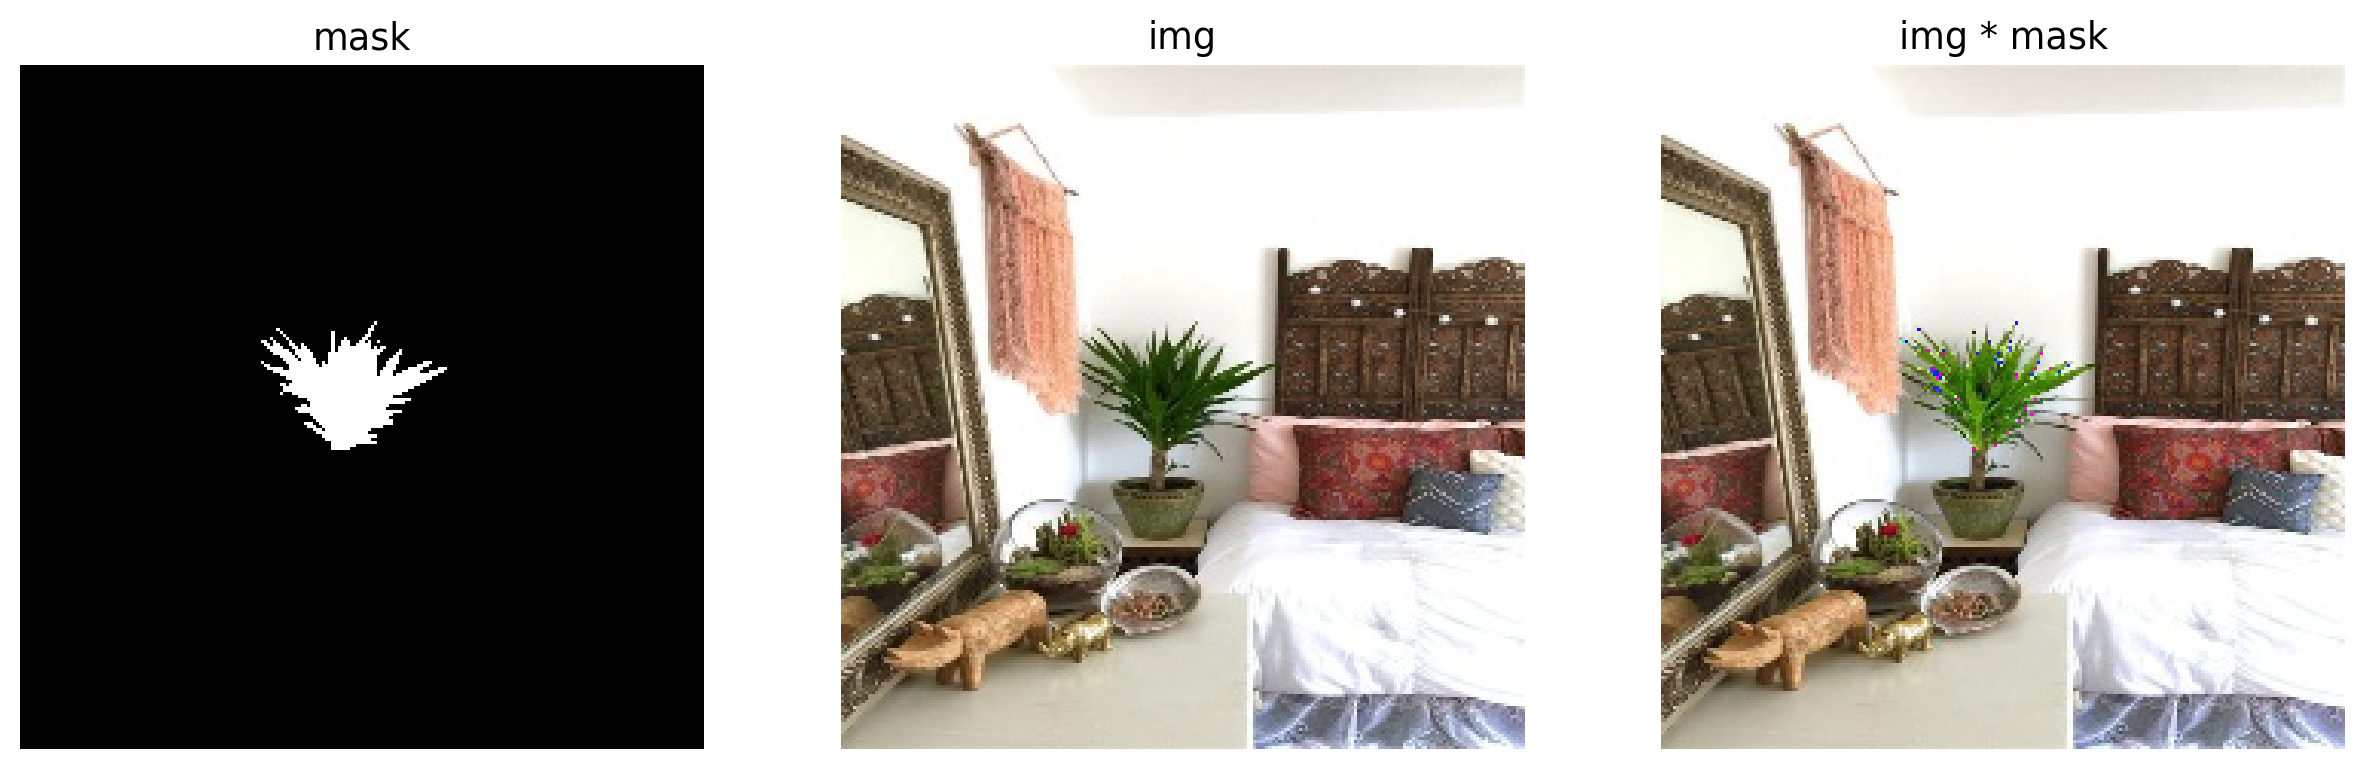

In [ ]:
#@title Show a masked image and save a mask
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(131)
# with_mask = np.array(plt.imread(f"./{fname.split('.')[1]}_mask.png")[:,:,:3])
# mask = (with_mask[:,:,0]==1)*(with_mask[:,:,1]==0)*(with_mask[:,:,2]==0)
mask = grabcut_mask[0]
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('mask')
plt.imsave(f"./{fname.split('.')[1]}_mask.png",mask, cmap='gray')

plt.subplot(132)
# img = np.array(plt.imread(f'{fname}')[:,:,:3])
img = im
plt.imshow(img)
plt.axis('off')
plt.title('img')

plt.subplot(133)
img = np.array((1-mask.reshape(mask.shape[0], mask.shape[1], -1))*plt.imread(fname)[:,:,:3])
_=plt.imshow(img)
_=plt.axis('off')
_=plt.title('img * mask')
plt.show()



In [ ]:
pwd

'/content/drive/MyDrive/2022_2proj/lama'

In [ ]:
print('Run inpainting')
# if '.jpeg' in fname:
#   !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir='/content/drive/MyDrive/2022_2 졸프/lama/output' dataset.img_suffix=.jpeg > /dev/null
# elif '.jpg' in fname:
!PYTHONPATH=. TORCH_HOME=$(pwd) 
!python3 predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=$(pwd)/output  dataset.img_suffix=.jpg > /dev/null
# elif '.png' in fname:
#   !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir='/content/drive/MyDrive/2022_2 졸프/lama/output'  dataset.img_suffix=.png > /dev/null
# else:
#   print(f'Error: unknown suffix .{fname.split(".")[-1]} use [.png, .jpeg, .jpg]')

Run inpainting
Cannot find primary config 'default.yaml'. Check that it's in your config search path.

Config search path:
	provider=hydra, path=pkg://hydra.conf
	provider=main, path=file:///content/drive/MyDrive/2022_2proj/configs/prediction
	provider=schema, path=structured://

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.


In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.imshow(plt.imread(f"/content/drive/MyDrive/2022_2 졸프/lama/output/{fname.split('.')[1].split('/')[2]}_mask.png"))
_=plt.axis('off')
_=plt.title('inpainting result')
plt.show()
fname = None